# Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
from matplotlib import pyplot as plt

import pandas as pd
from pandas import DataFrame
import more_itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.impute import SimpleImputer

from multiprocessing import Pool
from xgboost import XGBClassifier
import multiprocessing

pd.options.display.max_rows=900
pd.options.display.max_columns=900

%matplotlib inline
import seaborn as sns
from IPython.display import display

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils import plots as plot_utils
from data_science_utils.dataframe import column as column_utils
from data_science_utils import misc as misc
from data_science_utils import preprocessing as pp_utils

import warnings
import traceback
np.set_printoptions(threshold=np.nan)
warnings.filterwarnings('ignore')
import sys, os
import missingno as msno
import random
import gc

pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import RUSBoostClassifier


[nltk_data] Downloading package punkt to /Users/ahemf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ahemf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ahemf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ahemf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw to /Users/ahemf/nltk_data...
[nltk_data]   Package omw is already up-to-date!
Using TensorFlow backend.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB

import plotly
plotly.__version__
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

from lib import *
import pixiedust
import sys, os

sys.path.append(os.getcwd())

import os.path
import sys
from inspect import getsourcefile

current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = current_dir[:current_dir.rfind(os.path.sep)]

sys.path.insert(0, current_dir)

'3.7.0'

Pixiedust database opened successfully


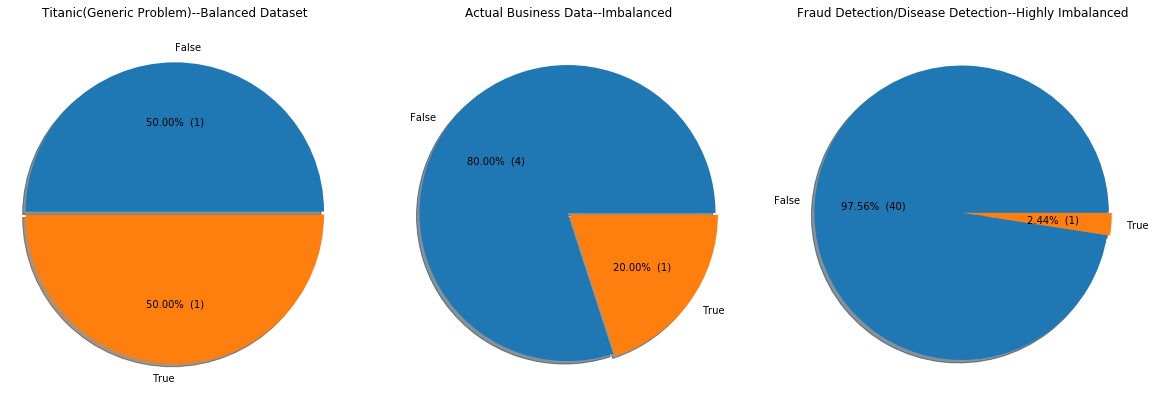

In [184]:
from IPython.core.display import display, HTML
display(HTML('<h1 style="text-align:center">Is your Target Imbalanced? Do you still use Accuracy? Don\'t!</h1>'))

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(20,7));
# pie chart

plot_pie(pd.Series([True,False]),ax1);
plot_pie(pd.Series([False,False,False,False,True]),ax2);
plot_pie(pd.Series([False]*40+[True]),ax3);
ax1.set_title("Titanic(Generic Problem)--Balanced Dataset");
ax2.set_title("Actual Business Data--Imbalanced");
ax3.set_title("Fraud Detection/Disease Detection--Highly Imbalanced");

plt.show();

# What Imbalanced Data looks like

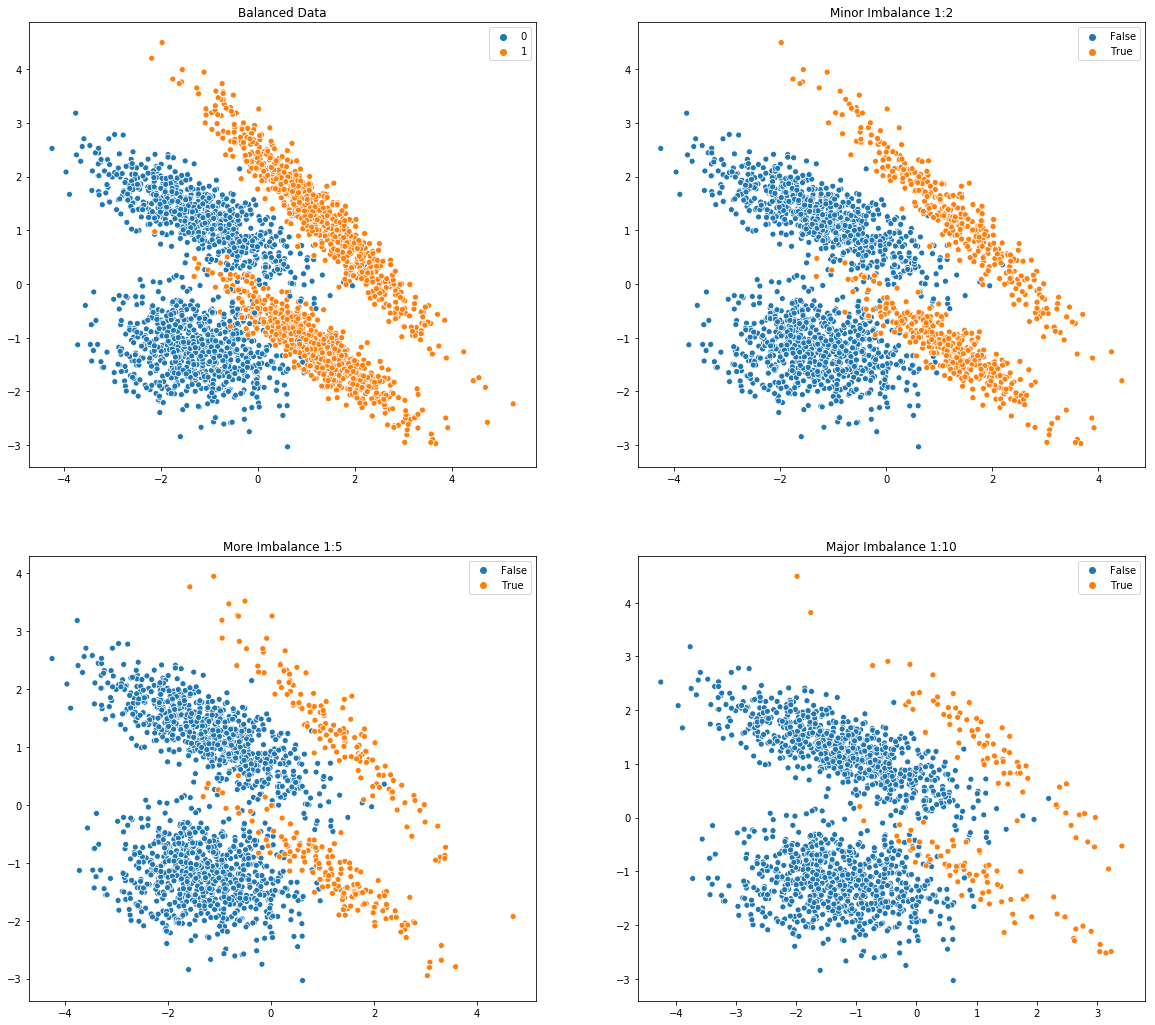

In [62]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=3000, n_features=2, n_informative=2, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,
                          class_sep=1.25,
                   flip_y=0,weights=[0.5,0.5])

X = pd.DataFrame(X)
y = pd.Series(y)




f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(20,18))
sns.scatterplot(X.values[:,0],X.values[:,1],hue=y,ax=ax1);
ax1.set_title("Balanced Data");

Xim_1,yim_1 = imbalance(X,y,pos_neg_frac=0.5)

sns.scatterplot(Xim_1.values[:,0],Xim_1.values[:,1],hue=yim_1,ax=ax2);
ax2.set_title("Minor Imbalance 1:2");

Xim_2,yim_2 = imbalance(X,y,pos_neg_frac=0.2)

sns.scatterplot(Xim_2.values[:,0],Xim_2.values[:,1],hue=yim_2,ax=ax3);
ax3.set_title("More Imbalance 1:5");

Xim_3,yim_3 = imbalance(X,y,pos_neg_frac=0.1)

sns.scatterplot(Xim_3.values[:,0],Xim_3.values[:,1],hue=yim_3,ax=ax4);
ax4.set_title("Major Imbalance 1:10");

plt.show();



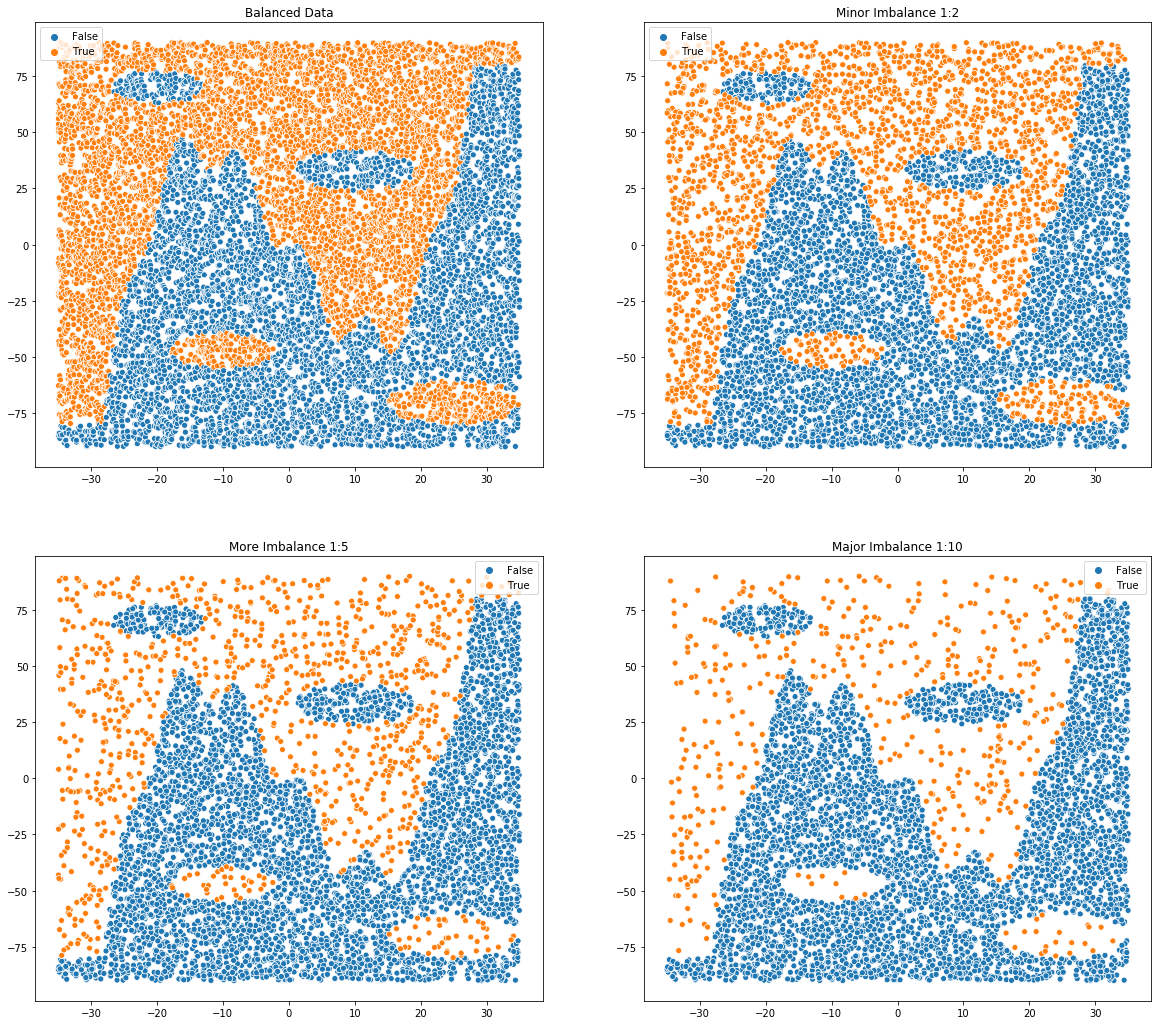

In [20]:
from sklearn.datasets import make_classification
X,y = generate_data(10000,plot=False)

X = pd.DataFrame(X)
y = pd.Series(y)



f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(20,18))
sns.scatterplot(X.values[:,0],X.values[:,1],hue=y,ax=ax1);
ax1.set_title("Balanced Data");

Xim_1,yim_1 = imbalance(X,y,pos_neg_frac=0.5)

sns.scatterplot(Xim_1.values[:,0],Xim_1.values[:,1],hue=yim_1,ax=ax2);
ax2.set_title("Minor Imbalance 1:2");

Xim_2,yim_2 = imbalance(X,y,pos_neg_frac=0.2)

sns.scatterplot(Xim_2.values[:,0],Xim_2.values[:,1],hue=yim_2,ax=ax3);
ax3.set_title("More Imbalance 1:5");

Xim_3,yim_3 = imbalance(X,y,pos_neg_frac=0.1)

sns.scatterplot(Xim_3.values[:,0],Xim_3.values[:,1],hue=yim_3,ax=ax4);
ax4.set_title("Major Imbalance 1:10");

plt.show();

## Interactive Versions

In [93]:
from sklearn.datasets import make_moons

X,y = make_moons(4000,noise=0.14)
X = pd.DataFrame(X,columns=['x','y'])
y = pd.Series(y)

def make_and_plot_imbalance(imbalance_ratio,X,y):
    f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(18,8))
    sns.scatterplot(X.values[:,0],X.values[:,1],hue=y,ax=ax1);
    ax1.set_title("Balanced Data");
    ax1.set_xlim((min(X.values[:,0]),max(X.values[:,0])))
    ax1.set_ylim((min(X.values[:,1]),max(X.values[:,1])))

    Xim_1,yim_1 = imbalance(X,y,pos_neg_frac=1.0/imbalance_ratio)

    sns.scatterplot(Xim_1.values[:,0],Xim_1.values[:,1],hue=yim_1,ax=ax2);
    ax2.set_title("Imbalance +ve:-ve = %s:%.0f, +ve class %% = %.2f%%"%((1,imbalance_ratio,(100/(imbalance_ratio+1)))));
    ax2.set_xlim((min(X.values[:,0]),max(X.values[:,0])))
    ax2.set_ylim((min(X.values[:,1]),max(X.values[:,1])))
    plt.show()
    

from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import HBox, Label
style = {'description_width': 'initial','widget_width': '800px'}
# imbalance_ratio = widgets.FloatSlider(value=1,min=0.05, max=1, step=0.05,description='Imbalance Ratio',style = style)
imbalance_ratio = widgets.FloatLogSlider(
    value=1,
    base=3,
    min=0, # max exponent of base
    max=4, # min exponent of base
    step=0.75, # exponent step
    description='Negative/Positive',style=style
)

ui = widgets.HBox([imbalance_ratio])

out = widgets.interactive_output(make_and_plot_imbalance,{"imbalance_ratio":imbalance_ratio,"X":fixed(X),"y":fixed(y)})
display(ui, out)


Output()

# Building a function to study effects of varying levels of imbalance

In [146]:
def build_model():
    classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,random_state=13),
                         algorithm="SAMME",
                         n_estimators=5,random_state=49)
    return classifier

In [164]:
def imbalance_impact(build_model,scorers,data_generator):
    X,y = data_generator()
    scores = []
    space = np.logspace(-1.3, 0, num=40)
    # space = np.arange(0.02,1,0.02)
    imbalance_values = list(reversed(space))
    for imb in imbalance_values:
        X_res,y_res = imbalance(X,y,pos_neg_frac=imb)
        X_train, X_test, y_train, y_test = split(X_res,y_res)
        classifier = build_model()
        scores.append(run_classifier(classifier,scorers,X_train,y_train,X_test,y_test,plot=False))
        
    score_dict = {}
    for score in scores:
        for scorer,values in score.items():
            if scorer in score_dict:
                score_dict[scorer].append(values)
            else:
                score_dict[scorer] = [values]
                
    plt.figure(figsize=(20,10))
    ax = plt.axes()
    x = list(map(lambda x:"%.3f"%x,imbalance_values))
    for score,values in score_dict.items():
        values = np.array(values)
        # plt.plot(values[:,0],label="%s_train"%(score))
        plt.plot(smoothen(values[:,1]),label="%s"%(score))
    plt.legend()
    plt.xlabel("Increasing Imbalance (Ratio of +ve to -ve class) --> ")
    plt.ylabel("Metric (Higher is better) --> ")
    ax.xaxis.set_ticks(list(range(len(x))))
    ax.xaxis.set_ticklabels(x)
    # ax.set_xscale('log')
    ax.tick_params(axis='x', rotation=90)
    plt.show()
    return score_dict,scores

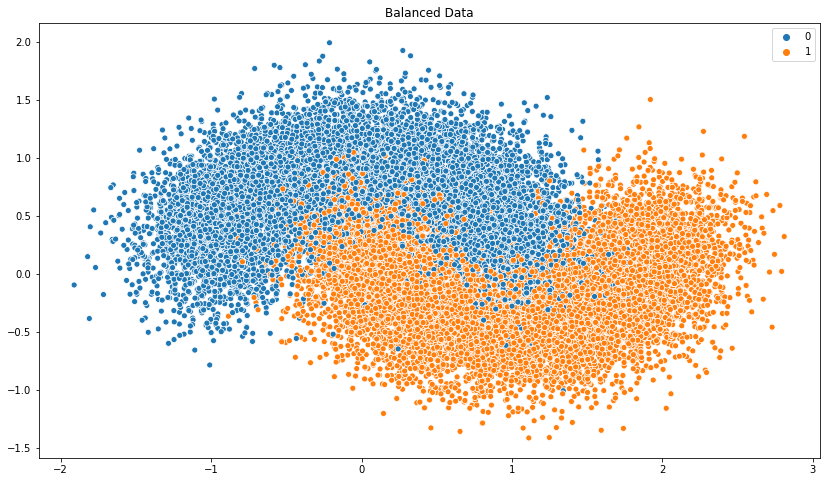

In [155]:
X,y = make_moons(20000,noise=0.28)
f, (ax1) = plt.subplots(nrows=1, ncols=1,figsize=(14,8))
sns.scatterplot(X[:,0],X[:,1],hue=y,ax=ax1);
ax1.set_title("Balanced Data");

In [156]:
def create_data():
    X,y = make_moons(20000,noise=0.28)
    X = pd.DataFrame(X,columns=['x','y'])
    y = pd.Series(y)
    return X,y

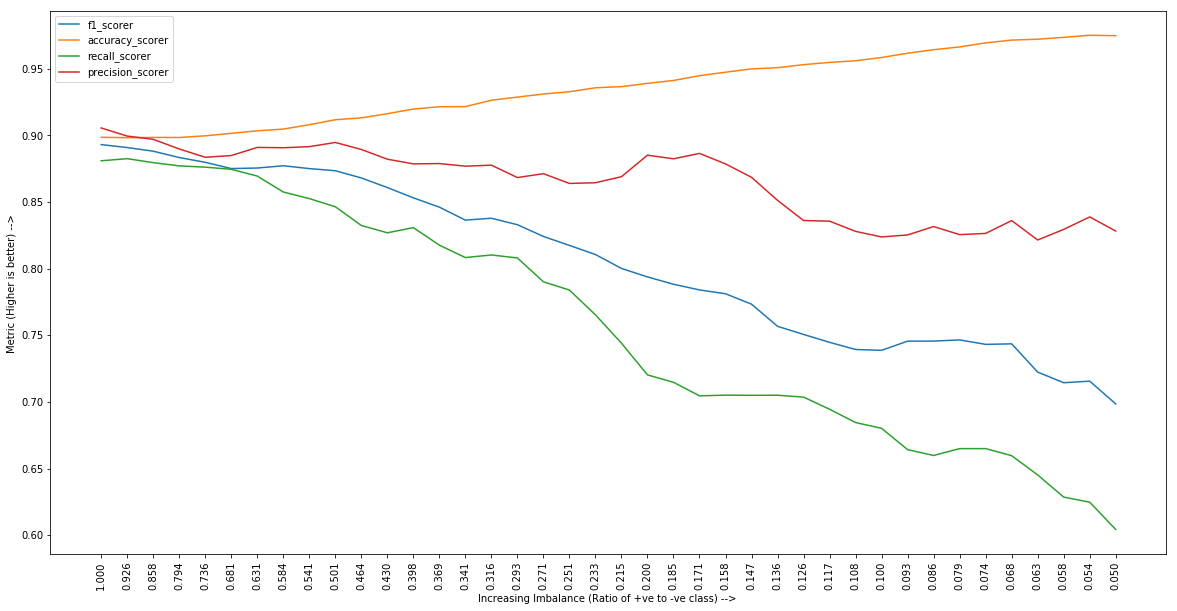

In [165]:
score_dict,scores = imbalance_impact(build_model,
                                     [f1_scorer,accuracy_scorer, recall_scorer,precision_scorer],create_data)


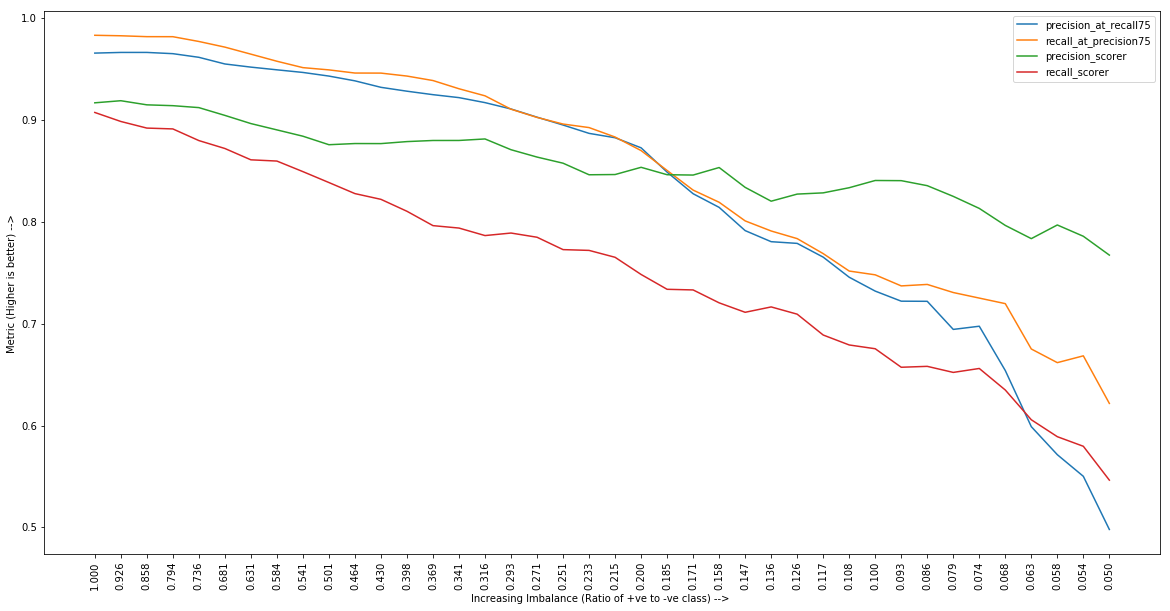

In [166]:
def precision_at_recall75(y,y_pred,y_score):
    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y, y_score)
    return precision[recall>0.75][-1]

def recall_at_precision75(y,y_pred,y_score):
    from sklearn.metrics import precision_recall_curve
    precision, recall, _ = precision_recall_curve(y, y_score)
    return recall[precision>0.75][0]

score_dict,scores = imbalance_impact(build_model,
                                     [precision_at_recall75,recall_at_precision75,precision_scorer,recall_scorer],create_data)


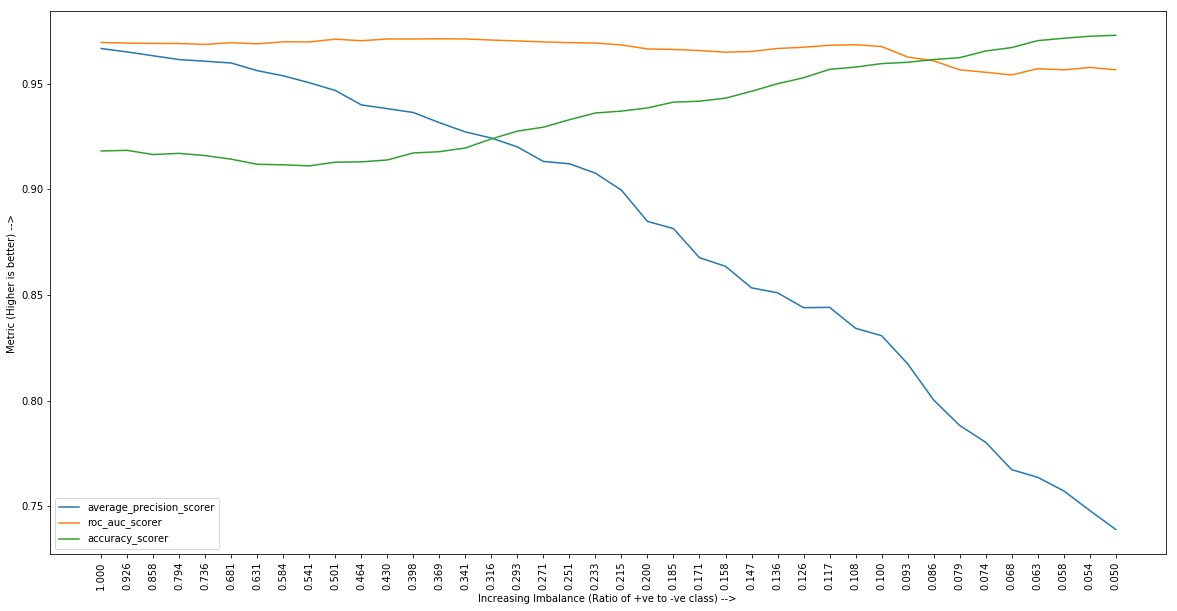

In [167]:
def roc_auc_scorer(y,y_pred,y_proba):
    from sklearn.metrics import roc_auc_score
    return roc_auc_score(y,y_proba)
score_dict,scores = imbalance_impact(build_model,
                                     [average_precision_scorer,roc_auc_scorer,accuracy_scorer],create_data)


In [ ]:
def data_generator():
    X = pd.read_csv("titanic.csv")
    y = X['Survived']
    # drop the target column from X
    df_utils.drop_columns_safely(X,['Survived'],inplace=True)
    X['Sx'] = 0
    X.loc[X['Sex']=="male",'Sx'] = 1
    X = X[["Pclass","Sx","Age","Fare","SibSp"]]
    X = X.fillna(X.median())
    return X,y



def build_model():
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=5, max_depth=5)
    return classifier

score_dict,scores = imbalance_impact(build_model,
                                     [average_precision_scorer,roc_auc_scorer,accuracy_scorer],data_generator)
